In [105]:
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import zipfile
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리

In [2]:
# JSON 파일 경로
json_dir = r"C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3.개방데이터\1.데이터\Training\02.라벨링데이터\3. 스마트폰"

# 이미지 파일 경로
image_dir = r"C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3.개방데이터\1.데이터\Training\01.원천데이터\3. 스마트폰"

# 데이터를 저장할 리스트
data = []

# JSON 파일 탐색
for root, _, files in os.walk(json_dir):
    for file_name in files:
        if file_name.endswith('.json'):  # JSON 파일만 처리
            file_path = os.path.join(root, file_name)
            
            # JSON 파일 읽기
            with open(file_path, 'r', encoding='utf-8') as f:
                json_data = json.load(f)
            
            # 필요한 정보만 추출
            info = json_data.get('info', {})
            images = json_data.get('images', {})
            annotations = json_data.get('annotations', {})
            equipment = json_data.get('equipment', {})

            if equipment is None:
                equipment = {}

            # 추출한 정보를 하나의 딕셔너리로 저장
            data.append({
                'filename': file_name.split('.')[0],
                'id': info.get('id'),
                'gender': info.get('gender'),
                'age': info.get('age'),
                'date': info.get('date'),
                'skin_type': info.get('skin_type'),
                'sensitive': info.get('sensitive'),
                'device': images.get('device'),
                'angle': images.get('angle'),
                'facepart': images.get('facepart'),
                'bbox': images.get('bbox'),
                'acne': annotations.get('acne'),
                'pigmentation_count': equipment.get('pigmentation_count', 0)
            })

# 리스트를 DataFrame으로 변환
df = pd.DataFrame(data)

# 이미지 경로 리스트 생성
image_paths = []
for root, _, files in os.walk(image_dir):
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # 이미지 파일만 처리
            image_paths.append(os.path.join(root, file_name))

# 이미지 경로 DataFrame 생성
image_df = pd.DataFrame({
    'image_path': image_paths
})

# 이미지 파일명에서 번호 추출
image_df['image_number'] = image_df['image_path'].apply(lambda x: os.path.basename(x).split('_')[0])

# JSON 파일명에서 번호 추출
df['filename_number'] = df['filename'].apply(lambda x: x.split('_')[0])

# 두 DataFrame 매핑
df = pd.merge(df, image_df, left_on='filename_number', right_on='image_number', how='left')

# 최종 결과 확인
df

,filename,id,gender,age,date,skin_type,sensitive,device,angle,facepart,bbox,acne,pigmentation_count,filename_number,image_path,image_number
0,0002_03_F_00,0002,F,50,2023-07-27,0,0,2,0,0,"[0, 0, 1920, 2560]",None,158,0002,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0002
1,0002_03_F_01,0002,F,50,2023-07-27,0,0,2,0,1,"[788, 691, 1510, 1005]",None,0,0002,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0002
2,0002_03_F_02,0002,F,50,2023-07-27,0,0,2,0,2,"[1029, 1002, 1258, 1212]",None,0,0002,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0002
3,0002_03_F_03,0002,F,50,2023-07-27,0,0,2,0,3,"[600, 1141, 727, 1410]",None,0,0002,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0002
4,0002_03_F_04,0002,F,50,2023-07-27,0,0,2,0,4,"[1539, 1094, 1618, 1406]",None,0,0002,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1100_03_F_04,1100,F,28,2023-10-17,3,1,2,0,4,"[1533, 985, 1685, 1336]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
7718,1100_03_F_05,1100,F,28,2023-10-17,3,1,2,0,5,"[335, 1272, 795, 1809]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
7719,1100_03_F_06,1100,F,28,2023-10-17,3,1,2,0,6,"[1189, 1279, 1597, 1818]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
7720,1100_03_F_07,1100,F,28,2023-10-17,3,1,2,0,7,"[732, 1853, 1272, 2067]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100


In [3]:
# 스킨타입 중성 제거
df = df[df['skin_type'].isin([1, 2, 3, 4, 5])]
df

,filename,id,gender,age,date,skin_type,sensitive,device,angle,facepart,bbox,acne,pigmentation_count,filename_number,image_path,image_number
18,0006_03_F_00,0006,F,55,2023-07-27,3,0,2,0,0,"[0, 0, 600, 800]",None,90,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
19,0006_03_F_01,0006,F,55,2023-07-27,3,0,2,0,1,"[172, 182, 409, 282]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
20,0006_03_F_02,0006,F,55,2023-07-27,3,0,2,0,2,"[259, 284, 322, 360]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
21,0006_03_F_03,0006,F,55,2023-07-27,3,0,2,0,3,"[124, 348, 158, 426]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
22,0006_03_F_04,0006,F,55,2023-07-27,3,0,2,0,4,"[447, 326, 464, 415]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1100_03_F_04,1100,F,28,2023-10-17,3,1,2,0,4,"[1533, 985, 1685, 1336]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
7718,1100_03_F_05,1100,F,28,2023-10-17,3,1,2,0,5,"[335, 1272, 795, 1809]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
7719,1100_03_F_06,1100,F,28,2023-10-17,3,1,2,0,6,"[1189, 1279, 1597, 1818]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
7720,1100_03_F_07,1100,F,28,2023-10-17,3,1,2,0,7,"[732, 1853, 1272, 2067]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100


In [ ]:
# 피부타입 매핑
skin_type_mapping = {1: 0, 2: 0, 3: 0, 4: 1, 5: 1}

# 매핑 적용
df.loc[:, 'skin_type'] = df['skin_type'].map(skin_type_mapping)

# 결과 출력
df.reset_index()
df_skin2 = df

,index,filename,id,gender,age,date,skin_type,sensitive,device,angle,facepart,bbox,acne,pigmentation_count,filename_number,image_path,image_number
0,18,0006_03_F_00,0006,F,55,2023-07-27,0,0,2,0,0,"[0, 0, 600, 800]",None,90,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
1,19,0006_03_F_01,0006,F,55,2023-07-27,0,0,2,0,1,"[172, 182, 409, 282]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
2,20,0006_03_F_02,0006,F,55,2023-07-27,0,0,2,0,2,"[259, 284, 322, 360]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
3,21,0006_03_F_03,0006,F,55,2023-07-27,0,0,2,0,3,"[124, 348, 158, 426]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
4,22,0006_03_F_04,0006,F,55,2023-07-27,0,0,2,0,4,"[447, 326, 464, 415]",None,0,0006,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,0006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,7717,1100_03_F_04,1100,F,28,2023-10-17,0,1,2,0,4,"[1533, 985, 1685, 1336]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
5801,7718,1100_03_F_05,1100,F,28,2023-10-17,0,1,2,0,5,"[335, 1272, 795, 1809]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
5802,7719,1100_03_F_06,1100,F,28,2023-10-17,0,1,2,0,6,"[1189, 1279, 1597, 1818]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100
5803,7720,1100_03_F_07,1100,F,28,2023-10-17,0,1,2,0,7,"[732, 1853, 1272, 2067]",None,0,1100,C:\Users\USER\Downloads\028.한국인 피부상태 측정 데이터\3....,1100


In [6]:
# 1. age, skin_type, sensitive 열을 먼저 보존
df_grouped = df[['id', 'age', 'skin_type', 'image_path']].drop_duplicates()

# 2. facepart별 bbox 열을 pivot을 통해 분리
df_bboxes = df.pivot(index='id', columns='facepart', values='bbox')

# 3. bbox 값에서 xmin, ymin, xmax, ymax를 분리하여 새로운 열 생성
for i in range(9):  # 0부터 8까지 facepart
    if i in df_bboxes.columns:
        df_bboxes[f'facepart_{i}_xmin'] = df_bboxes[i].apply(lambda x: x[0] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_ymin'] = df_bboxes[i].apply(lambda x: x[1] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_xmax'] = df_bboxes[i].apply(lambda x: x[2] if isinstance(x, list) else None)
        df_bboxes[f'facepart_{i}_ymax'] = df_bboxes[i].apply(lambda x: x[3] if isinstance(x, list) else None)

# 4. 불필요한 facepart 열 삭제
df_bboxes = df_bboxes.drop(columns=[i for i in range(9) if i in df_bboxes.columns])

# 5. age, skin_type, sensitive 열을 다시 결합
df_final = pd.merge(df_bboxes, df_grouped, on='id', how='left')

# 6. 최종 데이터프레임 확인
print(df_final)

       id  facepart_0_xmin  facepart_0_ymin  facepart_0_xmax  facepart_0_ymax  \
0    0006                0                0              600              800   
1    0007                0                0             1920             2560   
2    0008                0                0              768             1024   
3    0010                0                0             1919             2560   
4    0011                0                0             1919             2560   
..    ...              ...              ...              ...              ...   
640  1096                0                0             2316             3088   
641  1097                0                0             2316             3088   
642  1098                0                0             2316             3088   
643  1099                0                0             2316             3088   
644  1100                0                0             2080             2784   

     facepart_1_xmin  facep

# 데이터 탐색

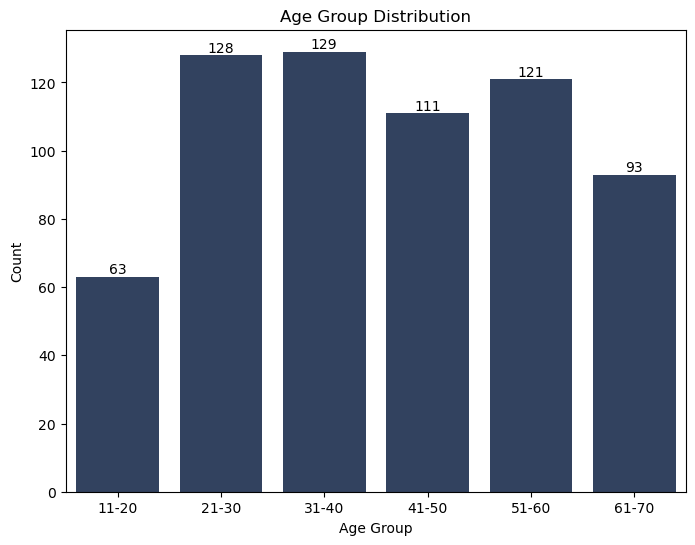

C:\Users\USER\AppData\Local\Temp\ipykernel_33172\2059294349.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette=['#2B4066'])
C:\Users\USER\AppData\Local\Temp\ipykernel_33172\2059294349.py:27: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  bar = sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette=['#2B4066'])


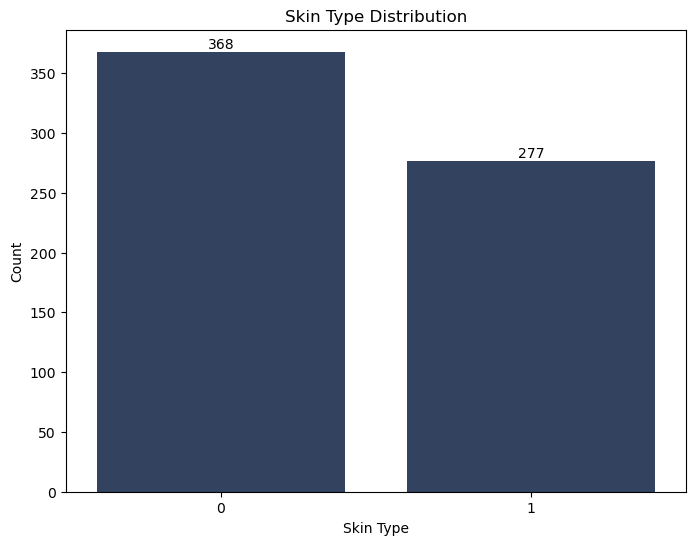

In [54]:
# 나이대 설정
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# 나이대별 수량 계산
age_group_counts = df_final['age_group'].value_counts().sort_index()

# 나이대별 히스토그램
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color='#2B4066')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 수량 표시
for index, value in enumerate(age_group_counts.values):
    plt.text(index, value, int(value), ha='center', va='bottom') 

plt.show()

# 피부 타입별 바 그래프
plt.figure(figsize=(8, 6))
skin_type_counts = df_final['skin_type'].value_counts()

# 바 그래프 그리기
bar = sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette=['#2B4066'])
plt.title('Skin Type Distribution')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.xticks(ticks=range(len(skin_type_counts.index)), labels=skin_type_counts.index, rotation=0)

# 수량 표시
for index, value in enumerate(skin_type_counts.values):
    plt.text(index, value, int(value), ha='center', va='bottom') 

## 1차 모델 설계 및 평가

In [30]:
# 이미지 로딩 및 전처리 함수
def load_and_preprocess_image(image_path, xmin, ymin, xmax, ymax, target_size=(224, 224)):
    img = Image.open(image_path)  # 이미지 로드
    img_cropped = img.crop((xmin, ymin, xmax, ymax))  # 주어진 좌표로 이미지 자르기
    img_resized = img_cropped.resize(target_size)  # 크기 조정
    img_resized = img_to_array(img_resized) / 255.0  # 이미지를 0~1 사이로 정규화
    return img_resized

In [8]:
# 모델 생성 함수 (ResNet50 사용)
def create_facepart_model(input_shape=(224, 224, 3)):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    
    # 나이대는 회귀로 예측 (실수 값)
    age_output = layers.Dense(1, activation='linear', name='age')(x)  # 회귀 출력
    # 피부타입은 이진 분류 (0: dry, 1: oily)
    skin_output = layers.Dense(1, activation='sigmoid', name='skin_type')(x)  # 이진 분류
    model = models.Model(inputs=base_model.input, outputs=[age_output, skin_output])
    
    model.compile(optimizer='adam', 
                  loss={'age': 'mean_squared_error', 'skin_type': 'binary_crossentropy'},
                  metrics={'age': 'mae', 'skin_type': 'accuracy'})
    return model

In [9]:
# 샘플 이미지에 예측 결과 표시
def plot_sample_image(image_path, row, model):
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    ax.axis('off')

    age_predictions = []
    skin_type_predictions = []
    
    for i in range(9):  # 9개의 얼굴 파트
        xmin = row[f'facepart_{i}_xmin']
        ymin = row[f'facepart_{i}_ymin']
        xmax = row[f'facepart_{i}_xmax']
        ymax = row[f'facepart_{i}_ymax']
        
        # 이미지에 구간 그리기
        ax.plot([xmin, xmax], [ymin, ymin], color='red')  # 상단
        ax.plot([xmin, xmax], [ymax, ymax], color='red')  # 하단
        ax.plot([xmin, xmin], [ymin, ymax], color='red')  # 왼쪽
        ax.plot([xmax, xmax], [ymin, ymax], color='red')  # 오른쪽
        
        # 이미지 로드 및 예측
        facepart_image = load_and_preprocess_image(row['image_path'], xmin, ymin, xmax, ymax)
        facepart_image = np.expand_dims(facepart_image, axis=0)  # 배치 차원 추가
        age_pred, skin_pred = model.predict(facepart_image)
        age_predictions.append(age_pred[0])  # 나이대 예측 (실수)
        skin_type_predictions.append(int(skin_pred >= 0.5))  # 피부타입 예측 (0 또는 1)
        
        # 각 예측 결과 텍스트로 표시
        ax.text(xmin, ymin - 10, f'{int(age_pred[0])}, {skin_pred[0]:.2f}', color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.7))

    # 9개 얼굴 파트의 예측값 평균
    avg_age = np.mean(age_predictions)
    avg_skin_type = np.mean(skin_type_predictions)

    # 나이대 범주화
    age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
    predicted_age = age_labels[int(round(avg_age / 10))]  # 나이를 10단위로 범주화
    
    predicted_skin_type = 'dry' if avg_skin_type < 0.5 else 'oily'
    
    ax.text(10, 10, f'Predicted Age: {predicted_age}, Skin Type: {predicted_skin_type}', color='green', fontsize=15, bbox=dict(facecolor='white', alpha=0.7))
    
    plt.show()

In [15]:
# 모델 생성
model = create_facepart_model()

# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_train = []
y_age_train = []
y_skin_train = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_train.append(image_data)
        y_age_train.append(row['age'])
        y_skin_train.append(row['skin_type'])

In [16]:
# NumPy 배열로 변환
X_train = np.array(X_train)
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)

# 모델 학습 (나이와 피부 타입을 동시에 예측)
model.fit(X_train, [y_age_train, y_skin_train], epochs=5, batch_size=2)

Epoch 1/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1326s 446ms/step - age_loss: 309.5187 - age_mae: 14.5558 - loss: 310.2973 - skin_type_accuracy: 0.5314 - skin_type_loss: 0.7785
Epoch 2/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1278s 440ms/step - age_loss: 246.0756 - age_mae: 13.3062 - loss: 246.8077 - skin_type_accuracy: 0.5308 - skin_type_loss: 0.7322
Epoch 3/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1249s 430ms/step - age_loss: 245.0165 - age_mae: 13.3086 - loss: 245.7468 - skin_type_accuracy: 0.5347 - skin_type_loss: 0.7303
Epoch 4/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1228s 423ms/step - age_loss: 242.5121 - age_mae: 13.2426 - loss: 243.2375 - skin_type_accuracy: 0.5282 - skin_type_loss: 0.7254
Epoch 5/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1193s 411ms/step - age_loss: 244.6686 - age_mae: 13.3342 - loss: 245.3914 - skin_type_accuracy: 0.5244 - skin_type_loss: 0.7228


In [10]:
def evaluate_model(model, X_data, y_age_data, y_skin_data):
    """
    모델 예측 및 정확도 평가 함수
    Args:
        model: 학습된 모델
        X_data: 입력 데이터
        y_age_data: 실제 나이 데이터
        y_skin_data: 실제 피부 타입 데이터
    """
    # 모델 예측
    age_predictions, skin_type_predictions = model.predict(X_data, batch_size=2)

    # 나이 예측 범주화 (0: 0대, 1: 10대, ..., 7: 70대 이상)
    def categorize_age(age_value):
        age_labels = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]  # 70대 이상 포함
        for i in range(len(age_labels) - 1):
            if age_labels[i] <= age_value < age_labels[i + 1]:
                return i

    # 실제 나이와 예측된 나이를 범주화
    y_age_data_categorized = np.array([categorize_age(age) for age in y_age_data])
    age_predicted_classes = np.array([categorize_age(age) for age in age_predictions.flatten()])

    # 피부 타입 예측 (0: dry, 1: oily)
    skin_predicted_classes = (skin_type_predictions.flatten() >= 0.5).astype(int)

    # 정확도 계산
    age_accuracy = np.mean(age_predicted_classes == y_age_data_categorized)
    skin_accuracy = np.mean(skin_predicted_classes == y_skin_data)

    # 출력
    print(f"Age Accuracy: {age_accuracy * 100:.2f}%")
    print(f"Skin Type Accuracy: {skin_accuracy * 100:.2f}%")

    return age_accuracy, skin_accuracy


# 평가 데이터 준비
age_accuracy, skin_accuracy = evaluate_model(model, X_train, y_age_train, y_skin_train)

# 모델 평가
loss, age_loss, skin_loss, age_mae, skin_accuracy_metric = model.evaluate(
    X_train, [y_age_train, y_skin_train], batch_size=2
)

# 평가 결과 출력
print("\n--- Model Evaluation Results ---")
print(f"Total Loss: {loss:.4f}")
print(f"Age Loss (MSE): {age_loss:.4f}")
print(f"Skin Type Loss (Binary Crossentropy): {skin_loss:.4f}")
print(f"Age MAE: {age_mae:.4f}")
print(f"Skin Type Accuracy (From Evaluation): {skin_accuracy_metric * 100:.2f}%")


NameError: name 'model' is not defined

In [75]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
import tensorflow as tf

# 모델 평가
loss, age_loss, skin_loss, age_mae, skin_accuracy_metric = model.evaluate(
    X_train, [y_age_train, y_skin_train], batch_size=2
)

# 예측 값 계산
y_skin_pred = model.predict(X_train)[1]  # 피부 타입 예측 값 (이진 분류)
y_skin_pred_class = (y_skin_pred > 0.5).astype(int)  # 0.5를 임계값으로 이진 분류

# 각 평가 지표 계산
f1 = f1_score(y_skin_train, y_skin_pred_class)
recall = recall_score(y_skin_train, y_skin_pred_class)
precision = precision_score(y_skin_train, y_skin_pred_class)
auc = roc_auc_score(y_skin_train, y_skin_pred)

# 평가 결과 출력
print("\n--- Model Evaluation Results ---")
print(f"Total Loss: {loss:.4f}")
print(f"Age Loss (MSE): {age_loss:.4f}")
print(f"Skin Type Loss (Binary Crossentropy): {skin_loss:.4f}")
print(f"Age MAE: {age_mae:.4f}")
print(f"Skin Type Accuracy (From Evaluation): {skin_accuracy_metric * 100:.2f}%")
print(f"Skin Type F1 Score: {f1:.4f}")
print(f"Skin Type Recall: {recall:.4f}")
print(f"Skin Type Precision: {precision:.4f}")
print(f"Skin Type AUC: {auc:.4f}")


2903/2903 ━━━━━━━━━━━━━━━━━━━━ 265s 91ms/step - age_loss: 287.6000 - age_mae: 13.3671 - loss: 288.4348 - skin_type_accuracy: 0.3796 - skin_type_loss: 0.8348
182/182 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step

--- Model Evaluation Results ---
Total Loss: 295.3954
Age Loss (MSE): 294.6179
Skin Type Loss (Binary Crossentropy): 0.7977
Age MAE: 14.5238
Skin Type Accuracy (From Evaluation): 42.95%
Skin Type F1 Score: 0.6009
Skin Type Recall: 1.0000
Skin Type Precision: 0.4295
Skin Type AUC: 0.4984


In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_user_image(image_path, row, model):
    img = Image.open(image_path)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(img)
    ax.axis('off')

    age_predictions = []
    skin_type_predictions = []

    for i in range(9):  # 9개의 얼굴 파트
        xmin = row[f'facepart_{i}_xmin']
        ymin = row[f'facepart_{i}_ymin']
        xmax = row[f'facepart_{i}_xmax']
        ymax = row[f'facepart_{i}_ymax'] 

        # 이미지에 구간 그리기
        ax.plot([xmin, xmax], [ymin, ymin], color='red')  # 상단
        ax.plot([xmin, xmax], [ymax, ymax], color='red')  # 하단
        ax.plot([xmin, xmin], [ymin, ymax], color='red')  # 왼쪽
        ax.plot([xmax, xmax], [ymin, ymax], color='red')  # 오른쪽

        # 이미지 로드 및 예측
        facepart_image = load_and_preprocess_image(row['image_path'], xmin, ymin, xmax, ymax)
        facepart_image = np.expand_dims(facepart_image, axis=0)  # 배치 차원 추가
        age_pred, skin_pred = model.predict(facepart_image)
        
        # NumPy 배열을 스칼라 값으로 변환
        age_pred = float(age_pred[0])  # 나이대 예측
        skin_pred = float(skin_pred[0])  # 피부타입 예측

        age_predictions.append(age_pred)
        skin_type_predictions.append(int(skin_pred >= 0.5))  # 피부타입 예측 (0 또는 1)

        # 각 예측 결과 텍스트로 표시
        ax.text(xmin, ymin - 10, f'{int(age_pred)}, {skin_pred:.2f}', color='white', fontsize=10, bbox=dict(facecolor='black', alpha=0.7))

    # 실제 나이대와 피부 타입 표시
    true_age = row['age']
    true_skin_type = row['skin_type']

    # 나이 범주화: 0-9 -> 10대, 10-19 -> 20대, 20-29 -> 30대, ...
    age_labels = ['10s', '20s', '30s', '40s', '50s', '60s', '70s']
    
    # 올바른 나이 범주화: 나이를 10으로 나눈 몫이 아니라 정확한 구간으로 매핑
    if true_age < 10:
        true_age_category = '10s'
    else:
        true_age_category = age_labels[min(len(age_labels) - 1, (true_age - 10) // 10)]

    # 피부 타입 (0: dry, 1: oily)
    true_skin_type_label = "dry" if true_skin_type == 0 else "oily"

    # 텍스트로 실제 나이대와 피부타입 표시
    true_text = f"True Age: {true_age_category}, True Skin Type: {true_skin_type_label}"
    
    # 실제 값 텍스트를 이미지 아래에 추가 (겹치지 않도록 위치 조정)
    plt.figtext(0.5, 0.2, true_text, wrap=True, horizontalalignment='center', fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.7))

    # 9개 얼굴 파트의 예측값 평균
    avg_age = np.mean(age_predictions)
    avg_skin_type = np.mean(skin_type_predictions)

    # 나이대 범주화
    predicted_age = age_labels[min(len(age_labels) - 1, (round(avg_age) - 10) // 10)]  # 나이를 10단위로 범주화

    predicted_skin_type = 'dry' if avg_skin_type < 0.5 else 'oily'

    # 결과 텍스트를 이미지 하단에 표시
    result_text = f'Predicted Age: {predicted_age}, Skin Type: {predicted_skin_type}'
    
    # 예측 결과 텍스트를 이미지 하단에 추가 (겹치지 않도록 위치 조정)
    plt.figtext(0.5, 0.17, result_text, wrap=True, horizontalalignment='center', fontsize=12, color='green', bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


C:\Users\USER\AppData\Local\Temp\ipykernel_33172\1464135057.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age_pred = float(age_pred[0])  # 나이대 예측
C:\Users\USER\AppData\Local\Temp\ipykernel_33172\1464135057.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  skin_pred = float(skin_pred[0])  # 피부타입 예측


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


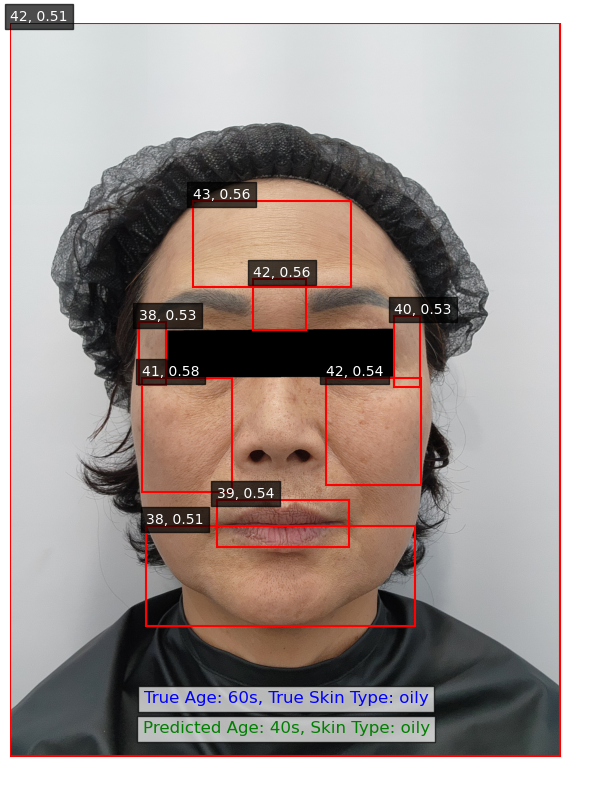

In [29]:
import random

# 랜덤으로 하나의 샘플을 선택
random_row = df_final.sample()  # 랜덤 샘플 선택

# 이미지 경로와 랜덤 샘플 데이터를 가져옴
random_image_path = random_row['image_path'].values[0]
random_row_data = random_row.iloc[0]

# 사용자 이미지를 예측하는 함수 호출
plot_user_image(random_image_path, random_row_data, model)

## 2차 모델 설계 및 평가
- 모델 구조를 좀 더 다양하게 구성

In [12]:
from tensorflow.keras import layers, models
import tensorflow as tf

def create_facepart_model_2(input_shape=(224, 224, 3)):
    # ResNet50 모델 불러오기 (pre-trained)
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 첫 번째 레이어: Conv2D 추가
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(base_model.output)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = layers.Dropout(0.3)(x)  # Dropout 추가

    # 두 번째 레이어: 추가적인 Conv2D 및 MaxPooling2D
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

    # 글로벌 평균 풀링 (추가 레이어 없이 바로 Fully Connected로 연결)
    x = layers.GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.4)(x)  # Dropout 추가

    # 나이대 예측 (회귀)
    age_output = layers.Dense(1, activation='linear', name='age')(x)

    # 피부타입 예측 (이진 분류)
    skin_output = layers.Dense(1, activation='sigmoid', name='skin_type')(x)

    # 모델 생성
    model = models.Model(inputs=base_model.input, outputs=[age_output, skin_output])

    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss={'age': 'mean_squared_error', 'skin_type': 'binary_crossentropy'},
                  metrics={'age': 'mae', 'skin_type': ['accuracy', tf.keras.metrics.AUC(name='auc')]})

    return model

In [13]:
# 모델 생성
model = create_facepart_model_2()

# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_train = []
y_age_train = []
y_skin_train = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_train.append(image_data)
        y_age_train.append(row['age'])
        y_skin_train.append(row['skin_type'])

In [14]:
# NumPy 배열로 변환
X_train = np.array(X_train)
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)

# 모델 학습 (나이와 피부 타입을 동시에 예측)
model.fit(X_train, [y_age_train, y_skin_train], epochs=5, batch_size=2)

Epoch 1/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1439s 483ms/step - age_loss: 299.9464 - age_mae: 13.6736 - loss: 301.8909 - skin_type_accuracy: 0.5177 - skin_type_auc: 0.5154 - skin_type_loss: 1.9443
Epoch 2/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1212s 418ms/step - age_loss: 162.2473 - age_mae: 10.2124 - loss: 163.8254 - skin_type_accuracy: 0.4981 - skin_type_auc: 0.4853 - skin_type_loss: 1.5781
Epoch 3/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1261s 434ms/step - age_loss: 134.5832 - age_mae: 9.1845 - loss: 135.8627 - skin_type_accuracy: 0.5222 - skin_type_auc: 0.5165 - skin_type_loss: 1.2794
Epoch 4/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1403s 483ms/step - age_loss: 117.6779 - age_mae: 8.6285 - loss: 118.7911 - skin_type_accuracy: 0.4963 - skin_type_auc: 0.4923 - skin_type_loss: 1.1132
Epoch 5/5
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1400s 482ms/step - age_loss: 101.0437 - age_mae: 7.9697 - loss: 101.9593 - skin_type_accuracy: 0.5160 - skin_type_auc: 0.5106 - skin_type_loss: 0.9156


In [18]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
import tensorflow as tf

# 모델 평가
results = model.evaluate(X_train, [y_age_train, y_skin_train], batch_size=2)

# 반환값 출력 및 할당
print(f"Evaluation Results: {results}")
loss, age_loss, skin_loss, age_mae, skin_accuracy_metric, _ = results  # 필요 없는 값 `_`로 처리

# 예측 값 계산
predictions = model.predict(X_train)
y_skin_pred = predictions[1]  # 피부 타입 예측 값
y_skin_pred_class = (y_skin_pred > 0.5).astype(int)

# 각 평가 지표 계산
f1 = f1_score(y_skin_train, y_skin_pred_class)
recall = recall_score(y_skin_train, y_skin_pred_class)
precision = precision_score(y_skin_train, y_skin_pred_class)
auc = roc_auc_score(y_skin_train, y_skin_pred)

# 평가 결과 출력
print("\n--- Model Evaluation Results ---")
print(f"Total Loss: {loss:.4f}")
print(f"Age Loss (MSE): {age_loss:.4f}")
print(f"Skin Type Loss (Binary Crossentropy): {skin_loss:.4f}")
print(f"Age MAE: {age_mae:.4f}")
print(f"Skin Type Accuracy (From Evaluation): {skin_accuracy_metric * 100:.2f}%")
print(f"Skin Type F1 Score: {f1:.4f}")
print(f"Skin Type Recall: {recall:.4f}")
print(f"Skin Type Precision: {precision:.4f}")
print(f"Skin Type AUC: {auc:.4f}")


2903/2903 ━━━━━━━━━━━━━━━━━━━━ 260s 90ms/step - age_loss: 193.0817 - age_mae: 11.1264 - loss: 193.7509 - skin_type_accuracy: 0.5880 - skin_type_auc: 0.5705 - skin_type_loss: 0.6690
Evaluation Results: [171.885986328125, 171.1807861328125, 0.6757041811943054, 10.402437210083008, 0.5665805339813232, 0.5724818706512451]
182/182 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step

--- Model Evaluation Results ---
Total Loss: 171.8860
Age Loss (MSE): 171.1808
Skin Type Loss (Binary Crossentropy): 0.6757
Age MAE: 10.4024
Skin Type Accuracy (From Evaluation): 56.66%
Skin Type F1 Score: 0.3955
Skin Type Recall: 0.3301
Skin Type Precision: 0.4931
Skin Type AUC: 0.5723


## 3차 모델 설계 및 평가
- 모델 구조 변화를 줌
- 피부 예측 모델에 좀 더 가중치를 두어 진행

In [31]:
def create_facepart_model_3(input_shape=(224, 224, 3), dropout_rate=0.3):
    """
    얼굴 부위를 예측하기 위한 ResNet50 기반 모델을 생성합니다.
    """
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 첫 번째 레이어: SeparableConv2D 추가
    x = layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same')(base_model.output)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.BatchNormalization()(x)

    # 두 번째 레이어
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(dropout_rate)(x)

    # 글로벌 평균 풀링
    x = layers.GlobalAveragePooling2D()(x)

    # 나이대 예측 브랜치 (회귀)
    age_branch = layers.Dense(128, activation='relu')(x)
    age_branch = layers.Dropout(0.4)(age_branch)
    age_output = layers.Dense(1, activation='linear', name='age')(age_branch)

    # 피부타입 분류 브랜치 (이진 분류)
    skin_branch = layers.Dense(128, activation='relu')(x)
    skin_branch = layers.Dropout(0.4)(skin_branch)
    skin_output = layers.Dense(1, activation='sigmoid', name='skin_type')(skin_branch)

    # 모델 생성
    model = models.Model(inputs=base_model.input, outputs=[age_output, skin_output])

    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss={'age': 'mean_squared_error', 'skin_type': 'binary_crossentropy'},
                  loss_weights={'age': 0.5, 'skin_type': 2.0},
                  metrics={'age': 'mae', 'skin_type': ['accuracy', tf.keras.metrics.AUC(name='auc')]})

    return model


In [32]:
# 모델 생성
model = create_facepart_model_3()

# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_train = []
y_age_train = []
y_skin_train = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_train.append(image_data)
        y_age_train.append(row['age'])
        y_skin_train.append(row['skin_type'])

In [33]:
# NumPy 배열로 변환
X_train = np.array(X_train)
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)

# 모델 학습 (나이와 피부 타입을 동시에 예측)
model.fit(X_train, [y_age_train, y_skin_train], epochs=10, batch_size=2)

Epoch 1/10
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1327s 445ms/step - age_loss: 228.5994 - age_mae: 16.7105 - loss: 230.6671 - skin_type_accuracy: 0.5206 - skin_type_auc: 0.5113 - skin_type_loss: 2.0678
Epoch 2/10
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1250s 431ms/step - age_loss: 84.8529 - age_mae: 10.3884 - loss: 86.3574 - skin_type_accuracy: 0.5371 - skin_type_auc: 0.5326 - skin_type_loss: 1.5045
Epoch 3/10
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1224s 422ms/step - age_loss: 69.9200 - age_mae: 9.4182 - loss: 71.3037 - skin_type_accuracy: 0.5553 - skin_type_auc: 0.5451 - skin_type_loss: 1.3838
Epoch 4/10
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1273s 438ms/step - age_loss: 54.5839 - age_mae: 8.2987 - loss: 55.9440 - skin_type_accuracy: 0.5729 - skin_type_auc: 0.5684 - skin_type_loss: 1.3602
Epoch 5/10
2903/2903 ━━━━━━━━━━━━━━━━━━━━ 1251s 431ms/step - age_loss: 48.8734 - age_mae: 7.8257 - loss: 50.2291 - skin_type_accuracy: 0.5655 - skin_type_auc: 0.5744 - skin_type_loss: 1.3556
Epoch 6/10
2903/2903 ━━━━━━━━━━━━━━━━━━━━

In [34]:
# 모델 평가
results = model.evaluate(X_train, [y_age_train, y_skin_train], batch_size=2)

# 반환값 출력 및 할당
print(f"Evaluation Results: {results}")
loss, age_loss, skin_loss, age_mae, skin_accuracy_metric, _ = results  # 필요 없는 값 `_`로 처리

# 예측 값 계산
predictions = model.predict(X_train)
y_skin_pred = predictions[1]  # 피부 타입 예측 값
y_skin_pred_class = (y_skin_pred > 0.5).astype(int)

# 각 평가 지표 계산
f1 = f1_score(y_skin_train, y_skin_pred_class)
recall = recall_score(y_skin_train, y_skin_pred_class)
precision = precision_score(y_skin_train, y_skin_pred_class)
auc = roc_auc_score(y_skin_train, y_skin_pred)

# 평가 결과 출력
print("\n--- Model Evaluation Results ---")
print(f"Total Loss: {loss:.4f}")
print(f"Age Loss (MSE): {age_loss:.4f}")
print(f"Skin Type Loss (Binary Crossentropy): {skin_loss:.4f}")
print(f"Age MAE: {age_mae:.4f}")
print(f"Skin Type Accuracy (From Evaluation): {skin_accuracy_metric * 100:.2f}%")
print(f"Skin Type F1 Score: {f1:.4f}")
print(f"Skin Type Recall: {recall:.4f}")
print(f"Skin Type Precision: {precision:.4f}")
print(f"Skin Type AUC: {auc:.4f}")

2903/2903 ━━━━━━━━━━━━━━━━━━━━ 268s 91ms/step - age_loss: 44.7787 - age_mae: 7.5798 - loss: 46.0756 - skin_type_accuracy: 0.6466 - skin_type_auc: 0.6399 - skin_type_loss: 1.2968
Evaluation Results: [42.17853546142578, 40.848941802978516, 1.3238685131072998, 7.232329845428467, 0.5951765775680542, 0.6244312524795532]
182/182 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step

--- Model Evaluation Results ---
Total Loss: 42.1785
Age Loss (MSE): 40.8489
Skin Type Loss (Binary Crossentropy): 1.3239
Age MAE: 7.2323
Skin Type Accuracy (From Evaluation): 59.52%
Skin Type F1 Score: 0.3993
Skin Type Recall: 0.3133
Skin Type Precision: 0.5504
Skin Type AUC: 0.6247


## 4차 모델 및 결과
- 스킨 타입 브랜치 추가로 좀 더 다양한 모델을 구성함

In [62]:
def create_facepart_model_4(input_shape=(224, 224, 3), dropout_rate=0.3):
    """
    스킨타입 분류 오류 수정 및 최적화된 모델
    """
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 공통 특징 추출기
    x = layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same')(base_model.output)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.GlobalAveragePooling2D()(x)

    # 나이대 예측 브랜치 (회귀)
    age_branch = layers.Dense(128, activation='relu')(x)
    age_branch = layers.Dropout(0.4)(age_branch)
    age_output = layers.Dense(1, activation='linear', name='age')(age_branch)

    # 피부타입 분류 브랜치 (Dense 레이어만 사용)
    skin_branch = layers.Dense(128, activation='relu')(x)
    skin_branch = layers.Dropout(0.5)(skin_branch)
    skin_branch = layers.Dense(64, activation='relu')(skin_branch)
    skin_branch = layers.Dropout(0.3)(skin_branch)
    skin_output = layers.Dense(1, activation='sigmoid', name='skin_type')(skin_branch)

    # 모델 생성
    model = models.Model(inputs=base_model.input, outputs=[age_output, skin_output])

    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss={'age': 'mean_squared_error', 'skin_type': 'binary_crossentropy'},
                  loss_weights={'age': 0.2, 'skin_type': 2.5},  # 스킨타입에 더 큰 비중
                  metrics={'age': 'mae', 'skin_type': ['accuracy', tf.keras.metrics.AUC(name='auc')]})

    return model



In [63]:
# 모델 생성
model = create_facepart_model_4()

# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_train = []
y_age_train = []
y_skin_train = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_train.append(image_data)
        y_age_train.append(row['age'])
        y_skin_train.append(row['skin_type'])

In [64]:
from sklearn.model_selection import train_test_split

# NumPy 배열로 변환
X_train = np.array(X_train)
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    list(zip(y_age_train, y_skin_train)),  # 나이와 피부타입 라벨을 묶어서 분리
    test_size=0.2,  # 테스트 데이터 비율
    random_state=42
)

# 나누어진 라벨을 다시 분리
y_age_train, y_skin_train = zip(*y_train)
y_age_test, y_skin_test = zip(*y_test)

# 넘파이 배열로 변환
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)
y_age_test = np.array(y_age_test)
y_skin_test = np.array(y_skin_test)

# 데이터셋 크기 출력
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 4644, Test set size: 1161


In [65]:
# 모델 학습
model.fit(X_train, [y_age_train, y_skin_train], epochs=30, batch_size=2)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1171s 488ms/step - age_loss: 99.6159 - age_mae: 17.2574 - loss: 101.7645 - skin_type_accuracy: 0.5047 - skin_type_auc: 0.4931 - skin_type_loss: 2.1487
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1149s 495ms/step - age_loss: 32.4344 - age_mae: 10.1451 - loss: 34.1782 - skin_type_accuracy: 0.5513 - skin_type_auc: 0.5158 - skin_type_loss: 1.7438
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1128s 486ms/step - age_loss: 26.3345 - age_mae: 9.1206 - loss: 28.0432 - skin_type_accuracy: 0.5506 - skin_type_auc: 0.5398 - skin_type_loss: 1.7087
Epoch 4/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1216s 524ms/step - age_loss: 22.1799 - age_mae: 8.3309 - loss: 23.8650 - skin_type_accuracy: 0.5882 - skin_type_auc: 0.5827 - skin_type_loss: 1.6851
Epoch 5/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1146s 494ms/step - age_loss: 17.9924 - age_mae: 7.5283 - loss: 19.6769 - skin_type_accuracy: 0.5707 - skin_type_auc: 0.5925 - skin_type_loss: 1.6845
Epoch 6/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 

In [66]:
from sklearn.metrics import mean_absolute_error, f1_score, recall_score, precision_score, roc_auc_score

# 학습셋 평가
train_results = model.evaluate(X_train, [y_age_train, y_skin_train], batch_size=2)
train_loss, train_age_loss, train_skin_loss, train_age_mae, train_skin_accuracy, _ = train_results

print(f"\n--- Train Data Evaluation Results ---")
print(f"Train Total Loss: {train_loss:.4f}")
print(f"Train Age Loss (MSE): {train_age_loss:.4f}")
print(f"Train Skin Type Loss (Binary Crossentropy): {train_skin_loss:.4f}")
print(f"Train Age MAE: {train_age_mae:.4f}")
print(f"Train Skin Type Accuracy: {train_skin_accuracy * 100:.2f}%")

# 트레인셋에서 예측 계산 (나이, 피부 타입)
train_predictions = model.predict(X_train)
y_age_train_pred = train_predictions[0]  # 나이 예측 값
y_skin_train_pred = train_predictions[1]  # 피부 타입 예측 값
y_skin_train_pred_class = (y_skin_train_pred > 0.5).astype(int)

# 트레인셋에서 MAE 계산 (나이 예측)
train_mae = mean_absolute_error(y_age_train, y_age_train_pred)
print(f"\n--- Train Set MAE ---")
print(f"Age Train MAE (Calculated Separately): {train_mae:.4f}")

# 트레인셋에서 피부 타입에 대한 평가 지표 계산
train_f1 = f1_score(y_skin_train, y_skin_train_pred_class)
train_recall = recall_score(y_skin_train, y_skin_train_pred_class)
train_precision = precision_score(y_skin_train, y_skin_train_pred_class)
train_auc = roc_auc_score(y_skin_train, y_skin_train_pred)

# 트레인셋 피부 타입 평가 지표 출력
print("\n--- Train Set Skin Type Evaluation Metrics ---")
print(f"Skin Type F1 Score: {train_f1:.4f}")
print(f"Skin Type Recall: {train_recall:.4f}")
print(f"Skin Type Precision: {train_precision:.4f}")
print(f"Skin Type AUC: {train_auc:.4f}")

# 모델 평가 (테스트 데이터 사용)
test_results = model.evaluate(X_test, [y_age_test, y_skin_test], batch_size=2)
test_loss, test_age_loss, test_skin_loss, test_age_mae, test_skin_accuracy, _ = test_results

# 평가 결과 출력 (테스트셋)
print(f"\n--- Test Data Evaluation Results ---")
print(f"Test Total Loss: {test_loss:.4f}")
print(f"Test Age Loss (MSE): {test_age_loss:.4f}")
print(f"Test Skin Type Loss (Binary Crossentropy): {test_skin_loss:.4f}")
print(f"Test Age MAE: {test_age_mae:.4f}")
print(f"Test Skin Type Accuracy: {test_skin_accuracy * 100:.2f}%")

# 예측 값 계산 (테스트 데이터 사용)
predictions = model.predict(X_test)
y_age_pred = predictions[0]  # 나이 예측 값
y_skin_pred = predictions[1]  # 피부 타입 예측 값
y_skin_pred_class = (y_skin_pred > 0.5).astype(int)

# 테스트 데이터에서 MAE 계산 (나이 예측)
test_mae = mean_absolute_error(y_age_test, y_age_pred)
print(f"\n--- Test Set MAE ---")
print(f"Age Test MAE (Calculated Separately): {test_mae:.4f}")

# 피부 타입에 대한 평가 지표 계산
f1 = f1_score(y_skin_test, y_skin_pred_class)
recall = recall_score(y_skin_test, y_skin_pred_class)
precision = precision_score(y_skin_test, y_skin_pred_class)
auc = roc_auc_score(y_skin_test, y_skin_pred)

# 피부 타입 테스트 데이터 평가 결과 출력
print("\n--- Model Test Evaluation Metrics ---")
print(f"Skin Type F1 Score: {f1:.4f}")
print(f"Skin Type Recall: {recall:.4f}")
print(f"Skin Type Precision: {precision:.4f}")
print(f"Skin Type AUC: {auc:.4f}")


2322/2322 ━━━━━━━━━━━━━━━━━━━━ 279s 119ms/step - age_loss: 7.0954 - age_mae: 4.6204 - loss: 8.6934 - skin_type_accuracy: 0.6473 - skin_type_auc: 0.6985 - skin_type_loss: 1.5980

--- Train Data Evaluation Results ---
Train Total Loss: 8.8200
Train Age Loss (MSE): 7.2151
Train Skin Type Loss (Binary Crossentropy): 1.6049
Train Age MAE: 4.6646
Train Skin Type Accuracy: 64.64%
146/146 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step

--- Train Set MAE ---
Age Train MAE (Calculated Separately): 4.6646

--- Train Set Skin Type Evaluation Metrics ---
Skin Type F1 Score: 0.5314
Skin Type Recall: 0.4653
Skin Type Precision: 0.6194
Skin Type AUC: 0.6948
581/581 ━━━━━━━━━━━━━━━━━━━━ 77s 130ms/step - age_loss: 19.3991 - age_mae: 7.7240 - loss: 21.0659 - skin_type_accuracy: 0.5842 - skin_type_auc: 0.6213 - skin_type_loss: 1.6669

--- Test Data Evaluation Results ---
Test Total Loss: 20.7935
Test Age Loss (MSE): 19.1259
Test Skin Type Loss (Binary Crossentropy): 1.6630
Test Age MAE: 7.7853
Test Skin Type Accuracy:

## 4차 모델 및 결과 (데이터 불균형 조정 후)
- 데이터 불균형 조정

In [90]:
def focal_loss(alpha=0.25, gamma=2.0, class_weights=None):
    def loss(y_true, y_pred):
        # 예측값을 0과 1 사이로 클리핑
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)

        # focal loss 계산
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        loss_value = -tf.reduce_mean(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))

        # 피부타입에 대해서만 클래스 가중치 적용
        if class_weights is not None:
            weight = tf.where(tf.equal(y_true, 1), class_weights[1], class_weights[0])
            loss_value *= weight

        return loss_value
    return loss

In [97]:
def create_facepart_model_5(input_shape=(224, 224, 3), dropout_rate=0.3):
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # 공통 특징 추출기
    x = layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same')(base_model.output)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.GlobalAveragePooling2D()(x)

    # 나이대 예측 브랜치 (회귀)
    age_branch = layers.Dense(128, activation='relu')(x)
    age_branch = layers.Dropout(0.4)(age_branch)
    age_output = layers.Dense(1, activation='linear', name='age')(age_branch)

    # 피부타입 분류 브랜치 (Dense 레이어만 사용)
    skin_branch = layers.Dense(128, activation='relu')(x)
    skin_branch = layers.Dropout(0.5)(skin_branch)
    skin_branch = layers.Dense(64, activation='relu')(skin_branch)
    skin_branch = layers.Dropout(0.3)(skin_branch)
    skin_output = layers.Dense(1, activation='sigmoid', name='skin_type')(skin_branch)

    # 모델 생성
    model = models.Model(inputs=base_model.input, outputs=[age_output, skin_output])

    # 피부타입 클래스 가중치 (0: 건성, 1: 지성)
    class_weights = [368 / (368 + 277), 277 / (368 + 277)]  # 건성(0)과 지성(1) 피부타입에 대한 가중치

    # 모델 컴파일
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss={'age': 'mean_squared_error', 
                        'skin_type': focal_loss(alpha=0.8, gamma=2.5, class_weights=class_weights)},  # focal loss 개선
                  loss_weights={'age': 0.2, 'skin_type': 2.5},
                  metrics={'age': 'mae', 'skin_type': ['accuracy', tf.keras.metrics.AUC(name='auc')]})

    return model


In [98]:
# 모델 생성
model = create_facepart_model_5()

# 데이터 준비 (각 얼굴 부위에 대해 학습 데이터 생성)
X_train = []
y_age_train = []
y_skin_train = []

# 예시로 나이대와 피부타입에 대한 라벨을 생성
for index, row in df_final.iterrows():
    for i in range(9):  # 얼굴 부위에 대한 반복
        image_data = load_and_preprocess_image(row['image_path'], row[f'facepart_{i}_xmin'], row[f'facepart_{i}_ymin'], row[f'facepart_{i}_xmax'], row[f'facepart_{i}_ymax'])
        X_train.append(image_data)
        y_age_train.append(row['age'])
        y_skin_train.append(row['skin_type'])

In [99]:
# NumPy 배열로 변환
X_train = np.array(X_train)
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)


# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    list(zip(y_age_train, y_skin_train)),  # 나이와 피부타입 라벨을 묶어서 분리
    test_size=0.2,  # 테스트 데이터 비율
    random_state=42
)

# 나누어진 라벨을 다시 분리
y_age_train, y_skin_train = zip(*y_train)
y_age_test, y_skin_test = zip(*y_test)

# 넘파이 배열로 변환
y_age_train = np.array(y_age_train)
y_skin_train = np.array(y_skin_train)
y_age_test = np.array(y_age_test)
y_skin_test = np.array(y_skin_test)

# 데이터셋 크기 출력
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 4644, Test set size: 1161


In [100]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',        # 검증 손실을 모니터링
    patience=5,                # 개선되지 않는 에포크를 5회 기다림
    restore_best_weights=True  # 최상의 가중치를 복원
)

# Training the model (without using class_weight in fit)
model.fit(
    X_train, [y_age_train, y_skin_train],
    validation_data=(X_test, [y_age_test, y_skin_test]),
    epochs=30,
    batch_size=2,
    callbacks=[early_stopping]  # Early stopping callback
)

Epoch 1/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1653s 693ms/step - age_loss: 94.4084 - age_mae: 16.8719 - loss: 94.8514 - skin_type_accuracy: 0.5161 - skin_type_auc: 0.4915 - skin_type_loss: 0.4431 - val_age_loss: 40.8341 - val_age_mae: 11.4127 - val_loss: 40.9684 - val_skin_type_accuracy: 0.5650 - val_skin_type_auc: 0.5071 - val_skin_type_loss: 0.1226
Epoch 2/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1614s 695ms/step - age_loss: 33.0160 - age_mae: 10.3472 - loss: 33.1479 - skin_type_accuracy: 0.5329 - skin_type_auc: 0.5211 - skin_type_loss: 0.1319 - val_age_loss: 25.7759 - val_age_mae: 8.9930 - val_loss: 25.9187 - val_skin_type_accuracy: 0.5814 - val_skin_type_auc: 0.5782 - val_skin_type_loss: 0.1207
Epoch 3/30
2322/2322 ━━━━━━━━━━━━━━━━━━━━ 1604s 691ms/step - age_loss: 26.1151 - age_mae: 9.1374 - loss: 26.2385 - skin_type_accuracy: 0.5463 - skin_type_auc: 0.5542 - skin_type_loss: 0.1234 - val_age_loss: 25.9826 - val_age_mae: 9.0140 - val_loss: 26.1265 - val_skin_type_accuracy: 0.5805 - val_skin_ty

In [101]:
from sklearn.metrics import mean_absolute_error, f1_score, recall_score, precision_score, roc_auc_score

# 학습셋 평가
train_results = model.evaluate(X_train, [y_age_train, y_skin_train], batch_size=2)
train_loss, train_age_loss, train_skin_loss, train_age_mae, train_skin_accuracy, _ = train_results

print(f"\n--- Train Data Evaluation Results ---")
print(f"Train Total Loss: {train_loss:.4f}")
print(f"Train Age Loss (MSE): {train_age_loss:.4f}")
print(f"Train Skin Type Loss (Binary Crossentropy): {train_skin_loss:.4f}")
print(f"Train Age MAE: {train_age_mae:.4f}")
print(f"Train Skin Type Accuracy: {train_skin_accuracy * 100:.2f}%")

# 트레인셋에서 예측 계산 (나이, 피부 타입)
train_predictions = model.predict(X_train)
y_age_train_pred = train_predictions[0]  # 나이 예측 값
y_skin_train_pred = train_predictions[1]  # 피부 타입 예측 값
y_skin_train_pred_class = (y_skin_train_pred > 0.5).astype(int)

# 트레인셋에서 MAE 계산 (나이 예측)
train_mae = mean_absolute_error(y_age_train, y_age_train_pred)
print(f"\n--- Train Set MAE ---")
print(f"Age Train MAE (Calculated Separately): {train_mae:.4f}")

# 트레인셋에서 피부 타입에 대한 평가 지표 계산
train_f1 = f1_score(y_skin_train, y_skin_train_pred_class)
train_recall = recall_score(y_skin_train, y_skin_train_pred_class)
train_precision = precision_score(y_skin_train, y_skin_train_pred_class)
train_auc = roc_auc_score(y_skin_train, y_skin_train_pred)

# 트레인셋 피부 타입 평가 지표 출력
print("\n--- Train Set Skin Type Evaluation Metrics ---")
print(f"Skin Type F1 Score: {train_f1:.4f}")
print(f"Skin Type Recall: {train_recall:.4f}")
print(f"Skin Type Precision: {train_precision:.4f}")
print(f"Skin Type AUC: {train_auc:.4f}")

# 모델 평가 (테스트 데이터 사용)
test_results = model.evaluate(X_test, [y_age_test, y_skin_test], batch_size=2)
test_loss, test_age_loss, test_skin_loss, test_age_mae, test_skin_accuracy, _ = test_results

# 평가 결과 출력 (테스트셋)
print(f"\n--- Test Data Evaluation Results ---")
print(f"Test Total Loss: {test_loss:.4f}")
print(f"Test Age Loss (MSE): {test_age_loss:.4f}")
print(f"Test Skin Type Loss (Binary Crossentropy): {test_skin_loss:.4f}")
print(f"Test Age MAE: {test_age_mae:.4f}")
print(f"Test Skin Type Accuracy: {test_skin_accuracy * 100:.2f}%")

# 예측 값 계산 (테스트 데이터 사용)
predictions = model.predict(X_test)
y_age_pred = predictions[0]  # 나이 예측 값
y_skin_pred = predictions[1]  # 피부 타입 예측 값
y_skin_pred_class = (y_skin_pred > 0.5).astype(int)

# 테스트 데이터에서 MAE 계산 (나이 예측)
test_mae = mean_absolute_error(y_age_test, y_age_pred)
print(f"\n--- Test Set MAE ---")
print(f"Age Test MAE (Calculated Separately): {test_mae:.4f}")

# 피부 타입에 대한 평가 지표 계산
f1 = f1_score(y_skin_test, y_skin_pred_class)
recall = recall_score(y_skin_test, y_skin_pred_class)
precision = precision_score(y_skin_test, y_skin_pred_class)
auc = roc_auc_score(y_skin_test, y_skin_pred)

# 피부 타입 테스트 데이터 평가 결과 출력
print("\n--- Model Test Evaluation Metrics ---")
print(f"Skin Type F1 Score: {f1:.4f}")
print(f"Skin Type Recall: {recall:.4f}")
print(f"Skin Type Precision: {precision:.4f}")
print(f"Skin Type AUC: {auc:.4f}")


2322/2322 ━━━━━━━━━━━━━━━━━━━━ 376s 162ms/step - age_loss: 18.3145 - age_mae: 7.5714 - loss: 18.4339 - skin_type_accuracy: 0.5709 - skin_type_auc: 0.6129 - skin_type_loss: 0.1194

--- Train Data Evaluation Results ---
Train Total Loss: 18.8927
Train Age Loss (MSE): 18.7731
Train Skin Type Loss (Binary Crossentropy): 0.1196
Train Age MAE: 7.6684
Train Skin Type Accuracy: 56.80%
146/146 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step

--- Train Set MAE ---
Age Train MAE (Calculated Separately): 7.6684

--- Train Set Skin Type Evaluation Metrics ---
Skin Type F1 Score: 0.0186
Skin Type Recall: 0.0095
Skin Type Precision: 0.4419
Skin Type AUC: 0.6078
581/581 ━━━━━━━━━━━━━━━━━━━━ 96s 166ms/step - age_loss: 20.4794 - age_mae: 7.9191 - loss: 20.5995 - skin_type_accuracy: 0.5603 - skin_type_auc: 0.6074 - skin_type_loss: 0.1201

--- Test Data Evaluation Results ---
Test Total Loss: 21.9399
Test Age Loss (MSE): 21.8085
Test Skin Type Loss (Binary Crossentropy): 0.1204
Test Age MAE: 8.2478
Test Skin Type Accur